In [12]:
from data.liver import preprocessing
import giraffe
from netZooPy.otter.otter import otter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

In [2]:
cache = True

In [3]:
if not cache:
    preprocessing.generate_data()

In [5]:
expression = pd.read_csv("data/liver/expression.txt", index_col = 0)
motif = pd.read_csv("data/liver/motif.txt", index_col = 0)
ppi = pd.read_csv("data/liver/ppi.csv", index_col = 0)

In [6]:
R = giraffe.Giraffe(expression.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), iterations = 20).get_regulation()

In [7]:
R.shape

(28456, 644)

In [8]:
# interventions = ['DROSHA', 'RBM14', 'SRSF4', 'SRSF7'] CRISPR
interventions = ['HNF1A', 'WT1', 'HIF1A', 'HSF1', 'SMAD2', 'SMAD3', 'SMAD4', 'STAT3', 'CEBPZ']

In [16]:
def intervention_score(intervention_name):
    tf_index = list(motif.columns).index(intervention_name)
    bpath = "data/liver/raw/"
    intervention = pd.read_csv(bpath + intervention_name + '.csv')[['Target Gene', 'Mean Expr. of Control', 'Mean Expr. of Treat']]
    intervention['diff'] = intervention[intervention.columns[1]] > intervention[intervention.columns[2]]
    score = 0
    tot = 0
    mm = 0
    mp = 0
    pm = 0
    pp = 0
    for i in range(intervention.shape[0]):
        gene = intervention.iloc[i]['Target Gene']
        if gene not in expression.index:
            continue
        tot += 1
        if R[list(expression.index).index(gene), tf_index] > 0:
            if intervention.iloc[i]['diff']:
                pp += 1
                score += 1
            else:
                pm += 1
        else:
            if not intervention.iloc[i]['diff']:
                mm += 1
                score += 1
            else:
                mp += 1
    sn.heatmap(data = [[pp, pm], [mp, mm]], annot = True)
    plt.show()
    print(intervention_name + " accuracy: " + str(score / tot))

In [20]:
list(motif.columns).index('ERF')

179

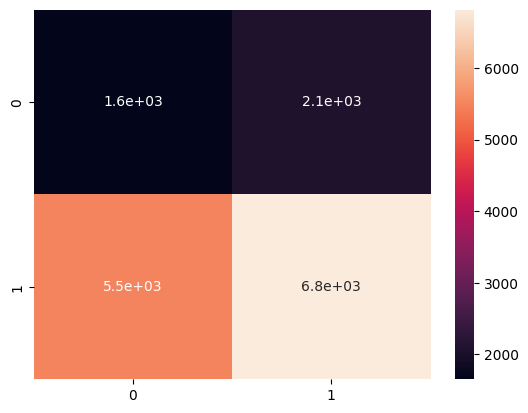

HNF1A accuracy: 0.5283289654311744


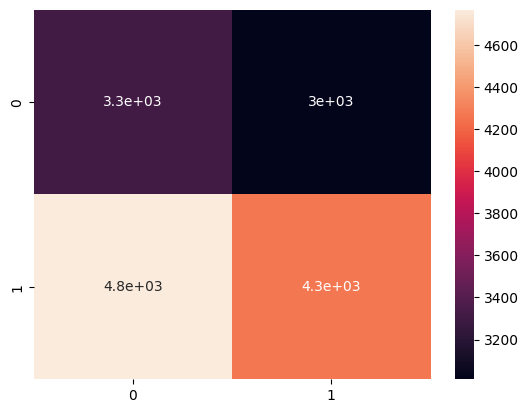

WT1 accuracy: 0.49371949235274976


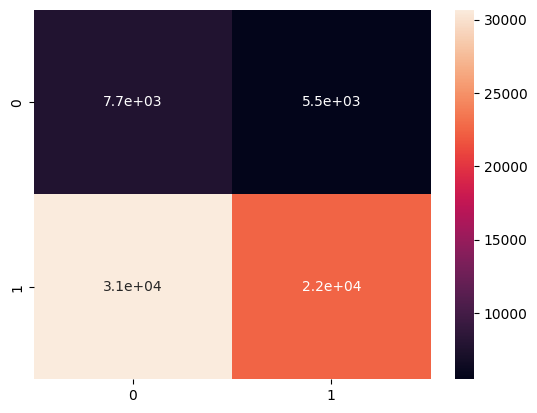

HIF1A accuracy: 0.45502382244737954


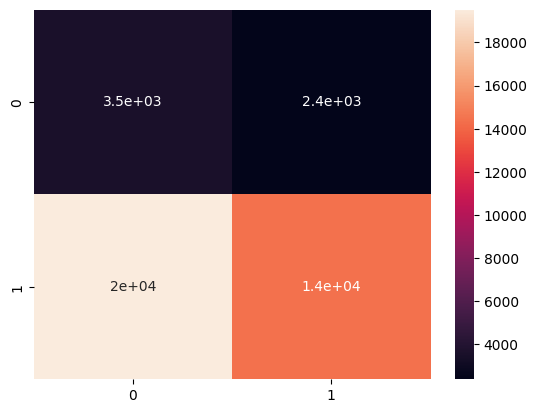

HSF1 accuracy: 0.4498994974874372


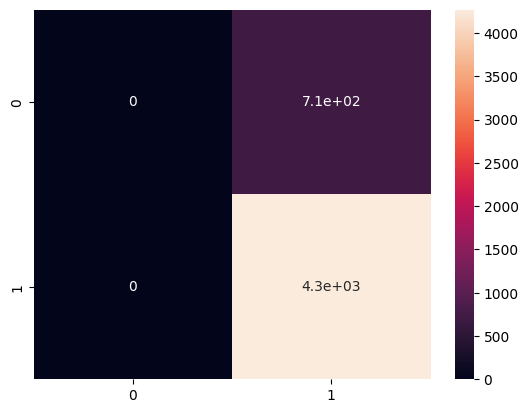

SMAD2 accuracy: 0.8570568159004216


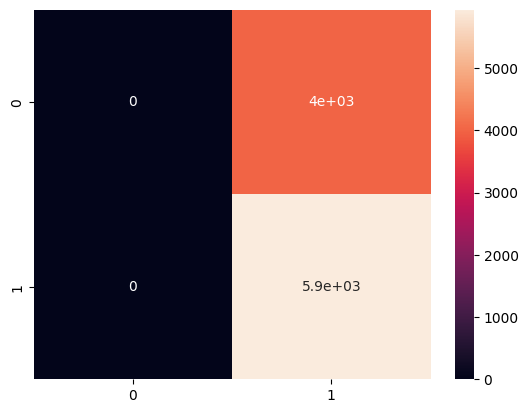

SMAD3 accuracy: 0.597366040012064


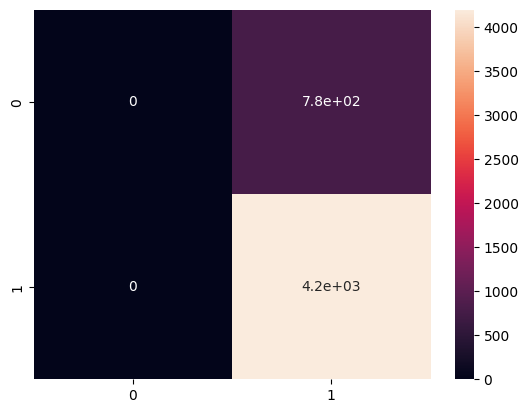

SMAD4 accuracy: 0.8430034129692833


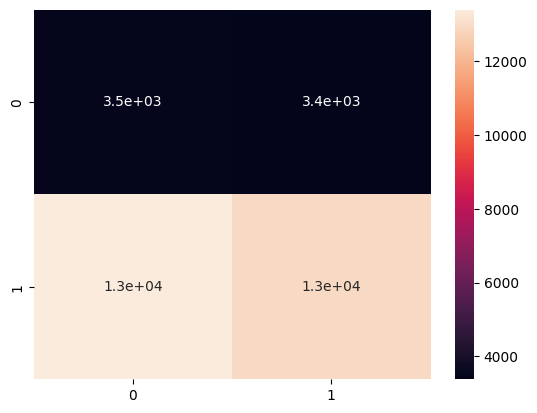

STAT3 accuracy: 0.49456013983906455


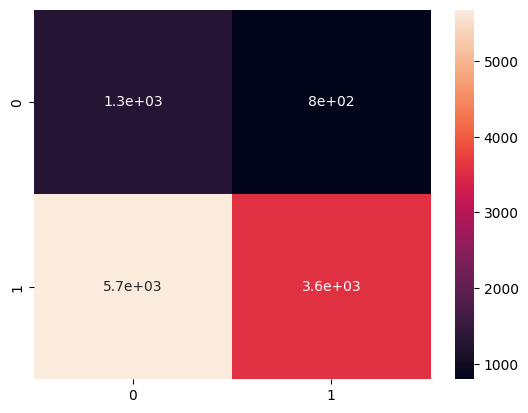

CEBPZ accuracy: 0.42785190421489794


In [17]:
# GIRAFFE
for intervention in interventions:
    intervention_score(intervention)

In [126]:
# GIRAFFE
for intervention in interventions:
    intervention_score(intervention)

HNF1A: 0.5283289654311744
WT1: 0.49371949235274976
HIF1A: 0.45502382244737954
HSF1: 0.4498994974874372
SMAD2: 0.8570568159004216
SMAD3: 0.597366040012064
SMAD4: 0.8430034129692833
STAT3: 0.49456013983906455
CEBPZ: 0.42785190421489794
